# Importing Overlay and checking available IPs

In [101]:
from pynq import Overlay
import time

In [102]:
ol = Overlay("fft_8.bit")

In [103]:
ol?

In [104]:
data_channel = ol.axi_dma_0

In [105]:
data_channel?

# Data Creation

In [106]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
samples = 8
T = 1
# f = 0.00001
# w = 2*np.pi*f
t = np.linspace(0,T,samples)

In [108]:
# data = np.sin(w*t)
data = np.array([0,1,2,2,1,0,1,2], dtype = np.csingle)

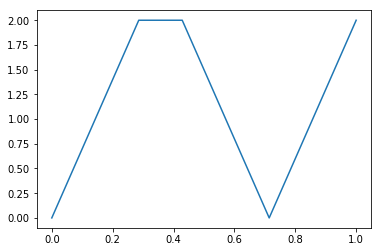

In [122]:
plt.plot(t, np.abs(data))

# PS Implementation

In [110]:
st=time.time()

golden_output = np.fft.fft(data, samples)

et=time.time()
print(et-st)

0.0010523796081542969


In [111]:
freq = np.fft.fftfreq(samples)
freq

array([ 0.   ,  0.125,  0.25 ,  0.375, -0.5  , -0.375, -0.25 , -0.125])

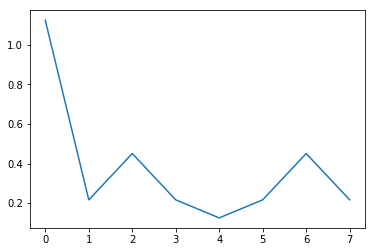

In [112]:
# freq.sort()
plt.plot((np.abs(golden_output))/samples)

# PL Implementation

In [113]:
from pynq import allocate

In [114]:
input_buffer = allocate(8,np.csingle)
output_buffer = allocate(8,np.csingle)

In [115]:
send_channel = data_channel.sendchannel
recv_channel = data_channel.recvchannel

In [116]:
np.copyto(input_buffer, data)

In [117]:
input_buffer?

In [118]:
st=time.time()

send_channel.transfer(input_buffer)
recv_channel.transfer(output_buffer)
send_channel.wait()
recv_channel.wait()

et=time.time()
print(et-st)

0.0027680397033691406


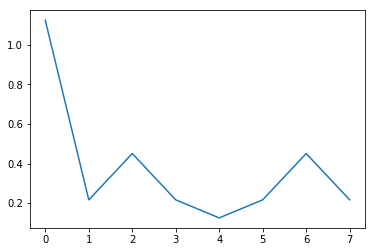

In [119]:
output = np.array([0]*8, dtype = np.cdouble)
np.copyto(output, output_buffer)
plt.plot((np.abs(output))/samples)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


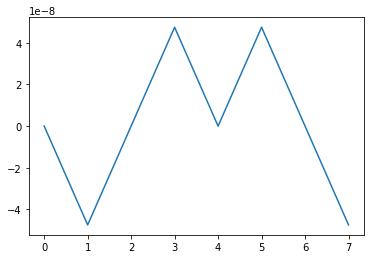

In [120]:
plt.plot(golden_output - output)